In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Pick LR and batch size

In [128]:
data = pd.read_csv('20-08 21-35-results_lr_batch_size.csv')

In [86]:
data.groupby(['lr', 'batch_size'])['loss', 'train_accuracy', 'test_accuracy'].mean()

loss  train_accuracy  test_accuracy
lr    batch_size                                         
0.001 128         2.112819        0.215678        0.22864
      256         2.288286        0.155022        0.15799
      512         2.306807        0.115798        0.11689
0.010 128         1.442024        0.478140        0.48958
      256         1.560710        0.435316        0.45656
      512         1.971460        0.264850        0.28071

# Analysis of Net 1 results-

In [197]:
data = pd.read_csv('20-08 22-15-results-net1.csv')

In [199]:
print('Time taken for execution (mins):', data[data.epoch == 30]['run duration'].sum()/60)

Time taken for execution (mins): 131.490822605292


In [133]:
data.head()

,Unnamed: 0,run,epoch,loss,train_accuracy,epoch duration,run duration,test_accuracy,total parameters,lr,batch_size,momentum,l1_oc,filter_multiplier,kernel_size,stride
0,0,1,1,2.289243,0.13284,11.115275,12.699039,0.1637,50677,0.01,128,0.9,6,1.5,3,1
1,1,1,2,1.955077,0.28780,10.628659,23.348657,0.3632,50677,0.01,128,0.9,6,1.5,3,1
2,2,1,3,1.638727,0.40942,10.644544,34.008129,0.4496,50677,0.01,128,0.9,6,1.5,3,1
3,3,1,4,1.489448,0.46480,10.630590,44.653661,0.4884,50677,0.01,128,0.9,6,1.5,3,1
4,4,1,5,1.410763,0.49480,10.604690,55.273293,0.5047,50677,0.01,128,0.9,6,1.5,3,1


### Best network configurations

In [135]:
data.iloc[data[data.test_accuracy == max(data.test_accuracy)].index, 1:]

,run,epoch,loss,train_accuracy,epoch duration,run duration,test_accuracy,total parameters,lr,batch_size,momentum,l1_oc,filter_multiplier,kernel_size,stride
611,21,12,0.70264,0.75468,11.333719,137.952505,0.6704,173026,0.01,128,0.9,18,2.0,3,1


In [137]:
ep_data = data.groupby('epoch')[['loss', 'train_accuracy', 'test_accuracy']].mean().copy()
(ep_data.iloc[::4, :].style.
background_gradient(subset='loss', cmap='YlGn'))

,loss,train_accuracy,test_accuracy
epoch,,,
1,2.23622,0.152521,0.212283
5,1.48243,0.457475,0.465504
9,1.27066,0.540806,0.522533
13,1.14816,0.586949,0.541071
17,1.06974,0.615036,0.541663
21,1.00953,0.636622,0.544188
25,0.959611,0.653947,0.544012
29,0.926576,0.665847,0.540546


### Effect of network width on mean accuracy

In [138]:
data.groupby('filter_multiplier')[['train_accuracy', 'test_accuracy']].mean()

,train_accuracy,test_accuracy
filter_multiplier,,
1.5,0.556711,0.505318
2.0,0.567998,0.511211


In [139]:
data.groupby('l1_oc')[['train_accuracy', 'test_accuracy']].mean()

,train_accuracy,test_accuracy
l1_oc,,
6,0.499471,0.464562
12,0.573669,0.518232
18,0.613924,0.541999


In [26]:
data.groupby(['l1_oc', 'filter_multiplier'])['loss', 'train_accuracy', 'test_accuracy'].mean()

loss  train_accuracy  test_accuracy
l1_oc filter_multiplier                                         
6     1.5                1.394118        0.490225       0.458456
      2.0                1.343711        0.508717       0.470668
12    1.5                1.186520        0.570227       0.518204
      2.0                1.168696        0.577110       0.518260
18    1.5                1.078876        0.609680       0.539293
      2.0                1.054219        0.618167       0.544705

### Effect of convolutional filter parameters on mean accuracy

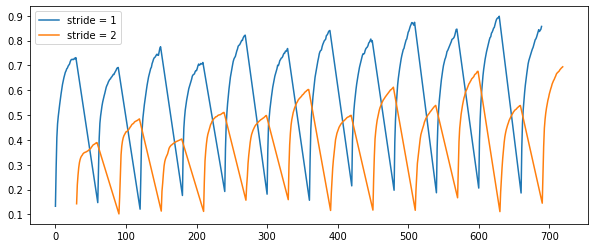

In [28]:
fig, ax = plt.subplots(figsize=(10,4))
for key, grp in data.groupby(['stride']):
    ax.plot(grp['train_accuracy'], label=key)

ax.legend(['stride = 1', 'stride = 2'])
plt.show()

#### The kernel size of 3x3 and 5x5 is still used in net 2 as it shows promising results. As 3x3 is conventional, but 5x5 is giving better performance

In [78]:
data.groupby(['kernel_size', 'stride'])[['loss', 'train_accuracy', 'test_accuracy']].mean()

loss  train_accuracy  test_accuracy
kernel_size stride                                         
3           1       0.889921        0.681618       0.585004
            2       1.621003        0.403468       0.392318
5           1       0.968880        0.653581       0.565333
            2       1.337623        0.510751       0.490402

# Analysis of net 2 
- **Conv Base:** conv(pad) --> conv --> pool --> conv(pad) --> conv --> pool
- **FCN      :** flatten --> fc1 --> fc2 --> fc3

Parameters with multiple values: 
    - l1_oc = [18, 32, 64] i.e. width of network.
    - kernel_size = [3, 5, 7] i.e. filter dimension for each conv layer

In [166]:
data = pd.read_csv('./csv_results/21-08 02-10-results-net2 final.csv')

In [169]:
data.tail()

,Unnamed: 0,run,epoch,loss,train_accuracy,epoch duration,run duration,test_accuracy,total parameters,lr,batch_size,momentum,l1_oc,filter_multiplier,kernel_size,stride
265,265,9,26,0.027420,0.99136,61.443311,1592.941623,0.6704,8512510,0.01,128,0.9,64,2,7,1
266,266,9,27,0.026816,0.99136,61.487429,1654.448003,0.6819,8512510,0.01,128,0.9,64,2,7,1
267,267,9,28,0.021951,0.99320,61.291009,1715.757930,0.6763,8512510,0.01,128,0.9,64,2,7,1
268,268,9,29,0.021413,0.99356,61.451278,1777.227161,0.6805,8512510,0.01,128,0.9,64,2,7,1
269,269,9,30,0.013421,0.99566,61.812269,1839.056337,0.6806,8512510,0.01,128,0.9,64,2,7,1


In [178]:
data.run.unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [188]:
data.epoch.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], dtype=int64)

In [196]:
print('Time taken for execution (mins):', data[data.epoch == 30]['run duration'].sum()/60)

Time taken for execution (mins): 175.63993533452353


In [151]:
net2 = data.drop(['Unnamed: 0', 'lr', 'batch_size', 'momentum', 'filter_multiplier', 'stride'], axis = 1)
net2['overfit%'] = 100*(net2['train_accuracy'] - net2['test_accuracy'])
net2['overfit%'] = net2['overfit%'].apply(lambda x: max(x, 0))

### Effect of number of epochs on mean accuracy

In [155]:
ep_data = net2.groupby('epoch')[['loss', 'train_accuracy', 'test_accuracy', 'overfit%']].mean().copy()
(ep_data.iloc[::4, :].style.
background_gradient(subset='loss', cmap='YlGn')
.background_gradient(subset='overfit%', cmap='Blues'))

,loss,train_accuracy,test_accuracy,overfit%
epoch,,,,
1,2.21909,0.158178,0.254411,0
5,1.18948,0.576427,0.584967,0.177556
9,0.719404,0.748044,0.661889,8.61556
13,0.431949,0.848084,0.663333,18.4751
17,0.234653,0.918202,0.658233,25.9969
21,0.135134,0.953464,0.670867,28.2598
25,0.0896555,0.969569,0.682633,28.6936
29,0.0579632,0.980733,0.686378,29.4356


In [156]:
net2.head()

,run,epoch,loss,train_accuracy,epoch duration,run duration,test_accuracy,total parameters,l1_oc,kernel_size,overfit%
0,1,1,2.249700,0.14648,19.975195,21.707564,0.2472,756442,18,3,0.0
1,1,2,1.836106,0.33672,19.849663,41.579161,0.3806,756442,18,3,0.0
2,1,3,1.521269,0.44826,19.848400,61.442529,0.5039,756442,18,3,0.0
3,1,4,1.332154,0.51910,19.789083,81.246567,0.5428,756442,18,3,0.0
4,1,5,1.182704,0.57792,19.812280,101.072815,0.5833,756442,18,3,0.0


### Best performing network params in net 2

In [157]:
best_net2 = net2[net2.test_accuracy == max(net2.test_accuracy)]
best_net2

,run,epoch,loss,train_accuracy,epoch duration,run duration,test_accuracy,total parameters,l1_oc,kernel_size,overfit%
237,8,28,0.016232,0.99482,71.089209,2006.254373,0.7503,4870654,64,5,24.452


In [163]:
net2.groupby(['l1_oc'])['loss', 'train_accuracy', 'test_accuracy', 'overfit%','total parameters'].mean()

,loss,train_accuracy,test_accuracy,overfit%,total parameters
l1_oc,,,,,
18,0.664360,0.762174,0.596192,17.314067,654346
32,0.530685,0.809776,0.632157,18.578000,1675198
64,0.442187,0.841359,0.663361,18.666822,5719038


In [165]:
net2.groupby(['kernel_size', 'l1_oc'])['loss', 'train_accuracy', 'test_accuracy', 'overfit%','total parameters'].mean()

loss  train_accuracy  test_accuracy   overfit%  \
kernel_size l1_oc                                                       
3           18     0.547348        0.803751       0.627340  18.405467   
            32     0.503197        0.819813       0.646653  18.134600   
            64     0.435177        0.843985       0.675820  17.709667   
5           18     0.737300        0.735795       0.600040  14.285800   
            32     0.536422        0.807123       0.646963  16.871400   
            64     0.440131        0.841774       0.681223  16.923067   
7           18     0.708431        0.746976       0.561197  19.250933   
            32     0.552437        0.802393       0.602853  20.728000   
            64     0.451254        0.838319       0.633040  21.367733   

                   total parameters  
kernel_size l1_oc                    
3           18               756442  
            32              1505470  
            64              3773950  
5           18               508474  
            32              1365694  
            64              4870654  
7           18               698122  
            32              2154430  
            64              8512510

## Analysis of net 3

In [17]:
net3 = pd.read_csv('21-08 13-58-results-net3.csv')
net3.head()
net3['overfit%'] = 100*(net3['train_accuracy'] - net3['test_accuracy'])
net3['overfit%'] = net3['overfit%'].apply(lambda x: max(x, 0))

In [18]:
print('Time taken for execution (mins):', net3[net3.epoch == 60]['run duration'].sum()/60)

Time taken for execution (mins): 675.0555671493213


In [19]:
max(net3.epoch)

60

Drop the redundant columns with only one parameter value such as lr, batch size, momentum, filter multiplier, stride, kernel size.

In [20]:
net3_d = net3.drop(['Unnamed: 0', 'lr', 'batch_size', 'momentum', 'filter_multiplier', 'kernel_size', 'stride'], axis = 1)

In [21]:
net3_d.head()

,run,epoch,loss,train_accuracy,epoch duration,run duration,test_accuracy,total parameters,l1_oc,dropout_rate,overfit%
0,1,1,1.565212,0.42652,42.249141,44.005446,0.5494,1506430,32,0.1,0.00
1,1,2,1.100756,0.60918,42.360696,86.387088,0.6498,1506430,32,0.1,0.00
2,1,3,0.930627,0.67444,40.776489,127.183514,0.6885,1506430,32,0.1,0.00
3,1,4,0.832537,0.71040,40.933626,168.132214,0.7085,1506430,32,0.1,0.19
4,1,5,0.761518,0.73602,41.669627,209.818762,0.7396,1506430,32,0.1,0.00


In [22]:
net3_d['total parameters'].unique()

array([1506430, 3775870, 6819454], dtype=int64)

### Best performing network params in net 3

In [23]:
best_net3 = net3_d[net3_d.test_accuracy == max(net3_d.test_accuracy)]
(best_net3.style.hide_index())

run,epoch,loss,train_accuracy,epoch duration,run duration,test_accuracy,total parameters,l1_oc,dropout_rate,overfit%
7,42,0.189188,0.9348,109.561,4596.02,0.875,6819454,96,0.1,5.98


In [24]:
# fig, ax = plt.subplots(figsize=(10,4))
# for key, grp in net3_d[net3_d['l1_oc'] == 32].groupby(['dropout_rate']):
#     ax.plot(grp['train_accuracy'], label=key)

# ax.legend(['p = 0.1', 'p = 0.3', 'p = 0.5'])
# plt.show()

Higher dropout leads to lower overfitting consistently. However, even the train_acc is also lower. Wider networks are performing better, due to more number of parameters.

In [25]:
net3_d.groupby(['dropout_rate'])['loss', 'train_accuracy', 'test_accuracy', 'overfit%'].mean()

,loss,train_accuracy,test_accuracy,overfit%
dropout_rate,,,,
0.1,0.374372,0.870216,0.827451,4.597644
0.3,0.506537,0.828132,0.799759,3.182089
0.5,0.685374,0.772994,0.757331,1.919489


In [26]:
net3_d.groupby(['dropout_rate', 'l1_oc'])['train_accuracy', 'test_accuracy', 'overfit%'].mean()

train_accuracy  test_accuracy  overfit%
dropout_rate l1_oc                                         
0.1          32           0.852952       0.816887  3.908433
             64           0.873759       0.828925  4.819367
             96           0.883938       0.836540  5.065133
0.3          32           0.806576       0.784138  2.581733
             64           0.833480       0.803658  3.353267
             96           0.844339       0.811480  3.611267
0.5          32           0.752568       0.740453  1.561533
             64           0.777789       0.761643  1.970033
             96           0.788625       0.769897  2.226900

In [27]:
net3_d.groupby(['l1_oc'])['train_accuracy', 'test_accuracy', 'overfit%', 'total parameters'].mean()

,train_accuracy,test_accuracy,overfit%,total parameters
l1_oc,,,,
32,0.804032,0.780493,2.683900,1506430
64,0.828343,0.798076,3.380889,3775870
96,0.838967,0.805972,3.634433,6819454


The plot of the train & test accuracy, loss and overfit % for the best model parameters is shown below. 

In [28]:
net3_d.groupby(['dropout_rate'])['loss', 'train_accuracy', 'test_accuracy', 'overfit%'].mean()

,loss,train_accuracy,test_accuracy,overfit%
dropout_rate,,,,
0.1,0.374372,0.870216,0.827451,4.597644
0.3,0.506537,0.828132,0.799759,3.182089
0.5,0.685374,0.772994,0.757331,1.919489


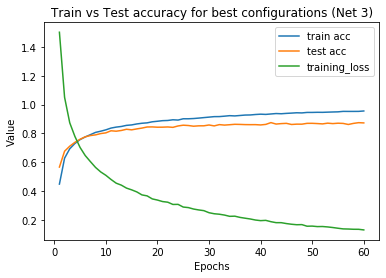

In [29]:
net3_d.groupby(['dropout_rate'])['loss', 'train_accuracy', 'test_accuracy', 'overfit%'].mean()
plt.plot(range(1, 61), net3_d[net3_d.run == 7]['train_accuracy'], label='train acc')
plt.plot(range(1, 61), net3_d[net3_d.run == 7]['test_accuracy'], label='test acc')
# plt.plot(range(1, 61), net3_d[net3_d.run == 7]['overfit%']/100, label='overfit')
plt.plot(range(1, 61), net3_d[net3_d.run == 7]['loss'], label='training_loss')
plt.ylabel('Value')

plt.xlabel('Epochs')
plt.title('Train vs Test accuracy for best configurations (Net 3)')
plt.legend()
plt.show()

Model can be trained for more epochs to achieve slightly higher performance, as training and testing accuracy has not yet plateaued.

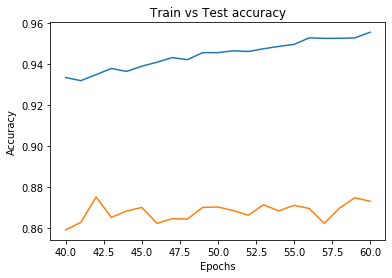

In [30]:
plt.plot(range(40, 61), net3_d[net3_d.run == 7]['train_accuracy'][39:], label='train')
plt.plot(range(40, 61), net3_d[net3_d.run == 7]['test_accuracy'][39:], label='test')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Train vs Test accuracy')
plt.show()

The test accuracy of 87% + is only obtained with dropout_rate of 0.1 and l1_oc of 96. However, the **overfit% is very high.**

In [31]:
net3_d[(net3_d.test_accuracy >= 0.87)]

,run,epoch,loss,train_accuracy,epoch duration,run duration,test_accuracy,total parameters,l1_oc,dropout_rate,overfit%
401,7,42,0.189188,0.93480,109.560796,4596.023922,0.8750,6819454,96,0.1,5.980
409,7,50,0.158642,0.94554,109.443285,5471.269086,0.8701,6819454,96,0.1,7.544
412,7,53,0.152852,0.94742,109.342768,5799.733782,0.8712,6819454,96,0.1,7.622
414,7,55,0.143810,0.94954,109.389959,6018.796874,0.8709,6819454,96,0.1,7.864
418,7,59,0.136498,0.95274,109.446221,6456.713142,0.8746,6819454,96,0.1,7.814
419,7,60,0.132228,0.95550,109.411460,6566.143290,0.8729,6819454,96,0.1,8.260


In [32]:
net3_d[(net3_d.test_accuracy >= 0.84) & (net3_d.dropout_rate >=0.1) & (net3_d['overfit%'] <=4)]

,run,epoch,loss,train_accuracy,epoch duration,run duration,test_accuracy,total parameters,l1_oc,dropout_rate,overfit%
29,1,30,0.345194,0.87952,41.053810,1240.107496,0.8401,1506430,32,0.1,3.942
202,4,23,0.343477,0.88154,73.507307,1696.673729,0.8434,3775870,64,0.1,3.814
377,7,18,0.367846,0.87332,109.320518,1970.003378,0.8447,6819454,96,0.1,2.862
378,7,19,0.346897,0.88066,109.362034,2079.382343,0.8452,6819454,96,0.1,3.546
452,8,33,0.358632,0.88044,111.017218,3630.533466,0.8411,6819454,96,0.3,3.934


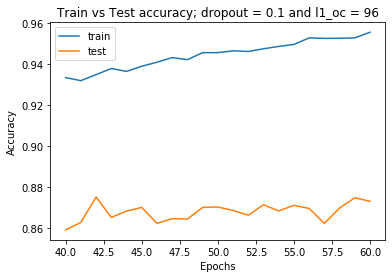

In [33]:
plt.plot(range(40, 61), net3_d[(net3_d.dropout_rate == 0.1) & (net3_d.l1_oc == 96)]['train_accuracy'][39:], label='train')
plt.plot(range(40, 61), net3_d[(net3_d.dropout_rate == 0.1) & (net3_d.l1_oc == 96)]['test_accuracy'][39:], label='test')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Train vs Test accuracy; dropout = 0.1 and l1_oc = 96')
plt.legend()
plt.show()

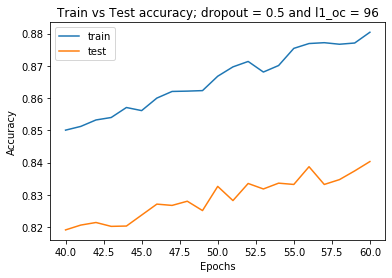

In [34]:
plt.plot(range(40, 61), net3_d[(net3_d.dropout_rate == 0.5) & (net3_d.l1_oc == 96)]['train_accuracy'][39:], label='train')
plt.plot(range(40, 61), net3_d[(net3_d.dropout_rate == 0.5) & (net3_d.l1_oc == 96)]['test_accuracy'][39:], label='test')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Train vs Test accuracy; dropout = 0.5 and l1_oc = 96')
plt.legend()
plt.show()

In [155]:
# Observing the relative decrease in loss function (in epochs 50-60 for the best run) to set the threshold for LR scheduler in net4
abs(net3_d[net3_d.run == 7].loss.diff()[-10:].mean())

0.0026414038596153265

## Net 4: Sleeker and Deeper. l1oc = 32 and addition of 2 more convolutional layers

In [3]:
net4 = pd.read_csv("21-08 21-20-results-net4.csv")
net4.head()

,Unnamed: 0,run,epoch,loss,train_accuracy,epoch duration,run duration,test_accuracy,total parameters,lr,batch_size,momentum,l1_oc,filter_multiplier,kernel_size,stride,dropout_rate
0,0,1,1,1.644031,0.39372,87.056613,88.947983,0.5261,4403518,0.01,128,0.9,64,2,3,1,0.3
1,1,1,2,1.164040,0.58670,86.386106,182.887117,0.6269,4403518,0.01,128,0.9,64,2,3,1,0.3
2,2,1,3,0.980670,0.66140,86.424164,276.925926,0.6837,4403518,0.01,128,0.9,64,2,3,1,0.3
3,3,1,4,0.872868,0.70046,86.320916,370.793662,0.7172,4403518,0.01,128,0.9,64,2,3,1,0.3
4,4,1,5,0.791885,0.73238,86.609807,464.940316,0.7340,4403518,0.01,128,0.9,64,2,3,1,0.3


In [4]:
print('Time taken for execution (mins):', net4[net4.epoch == 100]['run duration'].sum()/60)

Time taken for execution (mins): 310.9642706513405


In [5]:
net4['overfit%'] = 100*(net4['train_accuracy'] - net4['test_accuracy'])
net4['overfit%'] = net4['overfit%'].apply(lambda x: max(x, 0))

In [6]:
net4 = net4.drop(['Unnamed: 0', 'lr', 'batch_size', 'momentum', 'filter_multiplier', 'kernel_size', 'stride'], axis = 1)

In [7]:
net4.groupby(['dropout_rate'])['loss', 'train_accuracy', 'test_accuracy', 'overfit%'].mean()

,loss,train_accuracy,test_accuracy,overfit%
dropout_rate,,,,
0.3,0.282095,0.904788,0.851131,5.57996
0.5,0.403003,0.869141,0.826185,4.52628


### Best configuration for Net 4

In [8]:
best_net4 = net4[net4.test_accuracy == max(net4.test_accuracy)]
(best_net4.style.hide_index())

run,epoch,loss,train_accuracy,epoch duration,run duration,test_accuracy,total parameters,l1_oc,dropout_rate,overfit%
1,91,0.0983406,0.96714,84.4099,8562.45,0.8874,4403518,64,0.3,7.974


In [9]:
len(net4[(net4.test_accuracy >= 0.88)])

24

In [10]:
net4[(net4.test_accuracy >= 0.88)]

,run,epoch,loss,train_accuracy,epoch duration,run duration,test_accuracy,total parameters,l1_oc,dropout_rate,overfit%
66,1,67,0.146806,0.95056,86.129933,6302.796441,0.8825,4403518,64,0.3,6.806
74,1,75,0.125084,0.95844,87.755014,7062.193651,0.8812,4403518,64,0.3,7.724
75,1,76,0.124651,0.95792,86.379493,7156.914870,0.8801,4403518,64,0.3,7.782
76,1,77,0.119829,0.96046,86.168276,7250.638555,0.8807,4403518,64,0.3,7.976
77,1,78,0.123408,0.95856,86.441612,7344.835397,0.8817,4403518,64,0.3,7.686
79,1,80,0.118945,0.96062,88.131264,7536.204082,0.8840,4403518,64,0.3,7.662
81,1,82,0.114613,0.96220,87.119478,7727.326578,0.8859,4403518,64,0.3,7.630
82,1,83,0.114796,0.96168,86.986590,7821.988643,0.8822,4403518,64,0.3,7.948
83,1,84,0.114118,0.96224,87.180289,7916.929168,0.8865,4403518,64,0.3,7.574
84,1,85,0.110228,0.96392,86.053237,8010.620980,0.8825,4403518,64,0.3,8.142


In [11]:
net4[(net4.test_accuracy >= 0.88)]['overfit%'].mean()

8.127833333333333

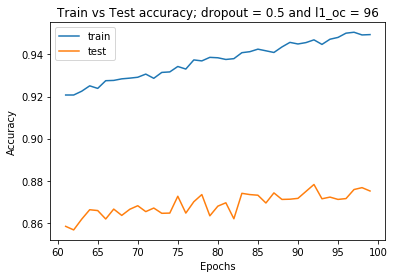

In [12]:
plt.plot(range(61, 100), net4[(net4.dropout_rate == 0.5)]['train_accuracy'][61:], label='train')
plt.plot(range(61, 100), net4[(net4.dropout_rate == 0.5)]['test_accuracy'][61:], label='test')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Train vs Test accuracy; dropout = 0.5 and l1_oc = 96')
plt.legend()
plt.show()

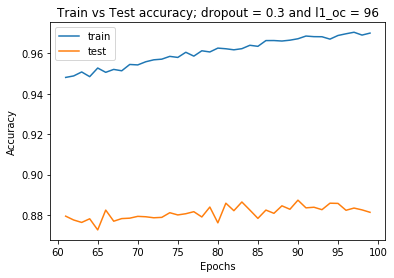

In [15]:
plt.plot(range(61, 100), net4[(net4.dropout_rate == 0.3)]['train_accuracy'][61:], label='train')
plt.plot(range(61, 100), net4[(net4.dropout_rate == 0.3)]['test_accuracy'][61:], label='test')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Train vs Test accuracy; dropout = 0.3 and l1_oc = 96')
plt.legend()
plt.show()

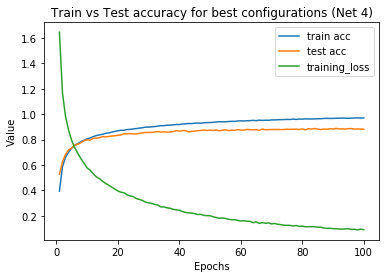

In [307]:
plt.plot(range(1, 101), net4[net4.dropout_rate == 0.3]['train_accuracy'], label='train acc')
plt.plot(range(1, 101), net4[net4.dropout_rate == 0.3]['test_accuracy'], label='test acc')
plt.plot(range(1, 101), net4[net4.dropout_rate == 0.3]['loss'], label='training_loss')
plt.ylabel('Value')
plt.xlabel('Epochs')
plt.title('Train vs Test accuracy for best configurations (Net 4)')
plt.legend()
plt.show()